# Project Overview 

What factors of car accident contribute to different injury outcomes?


## The area's in which I look to address are:

How can this be used in the outside world?

What features did I use?

What did the visualizations tell about my data?

What does the statistical techniques conclude about my data?

What model was best fit?

## Gathered Data 
Gathered Traffic Crashes dataset from Chicago data portal


# Importing libraries

In [1]:
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, recall_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import make_scorer, accuracy_score 
from matplotlib import pyplot as plt
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics 
from sklearn.utils import resample
from IPython.core.interactiveshell import InteractiveShell
from sklearn.model_selection import GridSearchCV
InteractiveShell.ast_node_interactivity = "all"
pd.set_option('display.max_rows', 200)
from sklearn import metrics
%matplotlib inline

In [3]:
#Loading and concating data
people = pd.read_csv('Traffic_Crashes_-_People.csv')
df = pd.read_csv('Traffic_Crashes_-_Crashes.csv')
result=pd.merge(people, df, on=['CRASH_RECORD_ID'], how = 'inner')

/Users/jeffreyng/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (12,13,20,21,22,23,24,25,26,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
#Initial cleaning
result.drop_duplicates(subset='CRASH_RECORD_ID', inplace=True)
A = ['REPORT_TYPE','INJURIES_TOTAL','RD_NO_y','CRASH_DATE_x','PERSON_ID','LOCATION','RD_NO_x','VEHICLE_ID','CITY','STATE','DRIVERS_LICENSE_STATE','SEAT_NO','DRIVERS_LICENSE_CLASS','HOSPITAL','EMS_AGENCY','EMS_RUN_NO','PEDPEDAL_ACTION','PEDPEDAL_VISIBILITY','PEDPEDAL_LOCATION','CELL_PHONE_USE','CRASH_DATE_EST_I','LANE_CNT','INTERSECTION_RELATED_I','NOT_RIGHT_OF_WAY_I','BAC_RESULT VALUE','HIT_AND_RUN_I','PHOTOS_TAKEN_I','STATEMENTS_TAKEN_I','DOORING_I','WORK_ZONE_I','WORK_ZONE_TYPE', 'WORKERS_PRESENT_I']     
result.drop(A,axis=1,inplace=True)
result.AGE.fillna(36,inplace=True)
result.SEX.fillna('U',inplace=True)
result['SEX'] =np.where(result['SEX']== 'U','M',result['SEX'])
result['SEX'] =np.where(result['SEX']== 'X','F',result['SEX'])
B = ['LATITUDE','LONGITUDE','MOST_SEVERE_INJURY',
 'INJURIES_FATAL',
 'INJURIES_INCAPACITATING',
 'INJURIES_NON_INCAPACITATING',
 'INJURIES_REPORTED_NOT_EVIDENT',
 'INJURIES_NO_INDICATION',
 'INJURIES_UNKNOWN', 'BEAT_OF_OCCURRENCE', 'NUM_UNITS', 'STREET_NO',
 'STREET_DIRECTION',
 'STREET_NAME', 'DATE_POLICE_NOTIFIED', 'CRASH_DATE_y']
result.drop(B,axis=1,inplace=True)
result.dropna(axis=0, inplace=True)
result['AGE']=result['AGE'].map(lambda x: int(x))
result['AGE']=result['AGE'].map(lambda x: str(x))
result['AGE']=result['AGE'].map(lambda x: x.replace('-49','49'))
result['AGE']=result['AGE'].map(lambda x: int(x))
result.drop(['CRASH_RECORD_ID'],axis=1,inplace=True)
result.drop(['ZIPCODE','ALIGNMENT'],axis=1,inplace=True)

# EDA

In [5]:
#created variable name eda
eda =result

# Anova test
Test whether there is a statistically significant difference in the average age based on their injury classification
- H0: The average age between different injury classes are all the same
- HA: The average age between different injury classes are not the same

In [6]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
formula = 'AGE ~ C(INJURY_CLASSIFICATION)'
lm = ols(formula, eda).fit()
table = sm.stats.anova_lm(lm, typ=2)
print(table)

                                sum_sq        df          F        PR(>F)
C(INJURY_CLASSIFICATION)  2.385408e+04       4.0  23.823833  9.948832e-20
Residual                  6.180437e+07  246904.0        NaN           NaN


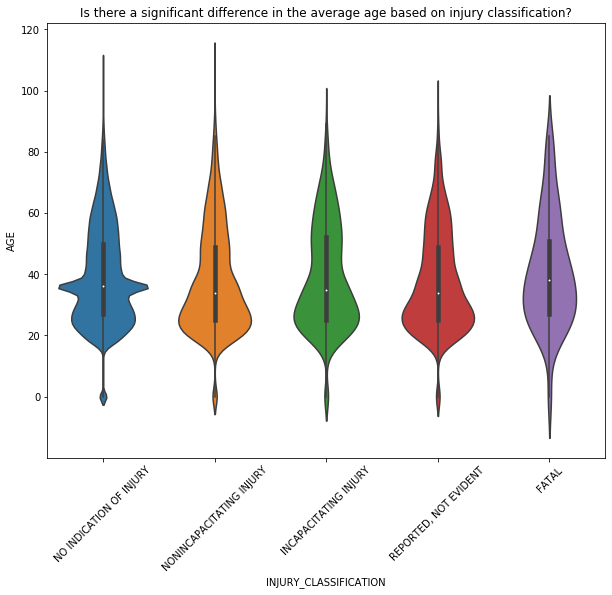

In [7]:
#Plotting violin chart
violin, ax = plt.subplots(figsize=(10,8))
sns.violinplot(y=result['AGE'], x=result['INJURY_CLASSIFICATION'], data=result)
ax.set(title='Is there a significant difference in the average age based on injury classification?')
plt.xticks(rotation=45)
violin.savefig('violin.png', bbox_inches='tight');


In [8]:
#creating a table to compare distribution of age and the injury class
no_indication = eda[eda['INJURY_CLASSIFICATION']=='NO INDICATION OF INJURY']
non_incapacitating = eda[eda['INJURY_CLASSIFICATION']=='NONINCAPACITATING INJURY']
reported = eda[eda['INJURY_CLASSIFICATION']=='REPORTED, NOT EVIDENT']
incapacitating = eda[eda['INJURY_CLASSIFICATION']=='INCAPACITATING INJURY']
fatal = eda[eda['INJURY_CLASSIFICATION']=='FATAL']
injury_bac = pd.DataFrame(columns=['NO INDICATION OF INJURY','NONINCAPACITATING INJURY','REPORTED, NOT EVIDENT','INCAPACITATING INJURY','FATAL'])
injury_bac['NO INDICATION OF INJURY']=no_indication.groupby('AGE')['AGE'].count()
injury_bac['NONINCAPACITATING INJURY']=non_incapacitating.groupby('AGE')['AGE'].count()
injury_bac['REPORTED, NOT EVIDENT']=reported.groupby('AGE')['AGE'].count()
injury_bac['INCAPACITATING INJURY']=incapacitating.groupby('AGE')['AGE'].count()
injury_bac['FATAL']=fatal.groupby('AGE')['AGE'].count()
injury_bac.fillna(0,inplace=True)
injury_bac

,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT",INCAPACITATING INJURY,FATAL
AGE,,,,,
0,2394,97.0,45.0,25.0,3.0
1,7,0.0,0.0,0.0,0.0
2,14,1.0,0.0,0.0,0.0
3,7,1.0,0.0,1.0,0.0
4,10,0.0,1.0,0.0,0.0
5,2,0.0,0.0,0.0,0.0
6,5,1.0,0.0,0.0,0.0
7,3,1.0,0.0,0.0,0.0
8,5,1.0,0.0,0.0,0.0


In [9]:
injury_bac.reset_index(inplace=True)

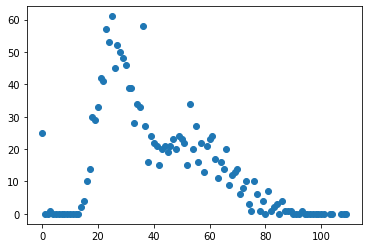

In [10]:
#distribution of age and injury that is incapacitating  
plt.scatter(injury_bac['AGE'], injury_bac['INCAPACITATING INJURY'])
plt.show();

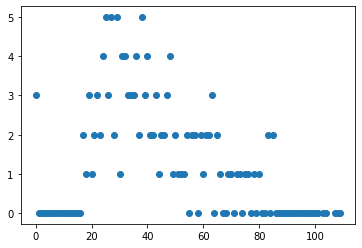

In [11]:
#distribution of age and injury that is fatal  
plt.scatter(injury_bac['AGE'], injury_bac['FATAL'])
plt.show();

People between their 20's to 40 are most likely to get an incapitating injury or fatal.

# Chi Squared

Is the type of injury independent of the crash type?
- H0: injury is independent of crash type
- HA: injury is not independent of crash type

In [12]:
#creating a table to compare distribution of crash type and the injury class
no_indication = eda[eda['INJURY_CLASSIFICATION']=='NO INDICATION OF INJURY']
non_incapacitating = eda[eda['INJURY_CLASSIFICATION']=='NONINCAPACITATING INJURY']
reported = eda[eda['INJURY_CLASSIFICATION']=='REPORTED, NOT EVIDENT']
incapacitating = eda[eda['INJURY_CLASSIFICATION']=='INCAPACITATING INJURY']
fatal = eda[eda['INJURY_CLASSIFICATION']=='FATAL']
injury_bac = pd.DataFrame(columns=['NO INDICATION OF INJURY','NONINCAPACITATING INJURY','REPORTED, NOT EVIDENT','INCAPACITATING INJURY','FATAL'])
injury_bac['NO INDICATION OF INJURY']=no_indication.groupby('FIRST_CRASH_TYPE')['FIRST_CRASH_TYPE'].count()
injury_bac['NONINCAPACITATING INJURY']=non_incapacitating.groupby('FIRST_CRASH_TYPE')['FIRST_CRASH_TYPE'].count()
injury_bac['REPORTED, NOT EVIDENT']=reported.groupby('FIRST_CRASH_TYPE')['FIRST_CRASH_TYPE'].count()
injury_bac['INCAPACITATING INJURY']=incapacitating.groupby('FIRST_CRASH_TYPE')['FIRST_CRASH_TYPE'].count()
injury_bac['FATAL']=fatal.groupby('FIRST_CRASH_TYPE')['FIRST_CRASH_TYPE'].count()
injury_bac.fillna(0,inplace=True)
injury_bac

,NO INDICATION OF INJURY,NONINCAPACITATING INJURY,"REPORTED, NOT EVIDENT",INCAPACITATING INJURY,FATAL
FIRST_CRASH_TYPE,,,,,
ANGLE,28048,1488,894.0,271.0,6.0
ANIMAL,187,5,1.0,1.0,0.0
FIXED OBJECT,10383,1252,371.0,362.0,65.0
HEAD ON,1835,203,64.0,67.0,8.0
OTHER NONCOLLISION,1059,64,16.0,22.0,2.0
OTHER OBJECT,2407,113,41.0,50.0,2.0
OVERTURNED,80,44,12.0,11.0,0.0
PARKED MOTOR VEHICLE,31413,1001,332.0,228.0,28.0
PEDALCYCLIST,2232,16,8.0,7.0,0.0


In [13]:
from scipy import stats
from scipy.stats import chi2_contingency
stat,p,dof,expected = stats.chi2_contingency(injury_bac)
prob=.95
critical = stats.chi2.ppf(prob,dof)
critical,stat

(88.25016442187412, 8295.509139620208)

We reject the null. We further explored and the most leathel car accidents are ones that you run into a fixed object

## Feature engineering

Rating primary cause of the crash and creating a risk percentage

In [14]:
result['prim']=result['PRIM_CONTRIBUTORY_CAUSE'].map({'UNABLE TO DETERMINE': 3,'FOLLOWING TOO CLOSELY': 3,'FAILING TO YIELD RIGHT-OF-WAY': 4,
'IMPROPER BACKING': 1.5,
'FAILING TO REDUCE SPEED TO AVOID CRASH':3.5 ,
'IMPROPER OVERTAKING/PASSING': 3,
'WEATHER': 3,
'NOT APPLICABLE': 3  ,
'DISREGARDING STOP SIGN': 2 ,
'DISTRACTION - FROM INSIDE VEHICLE': 2,
'PHYSICAL CONDITION OF DRIVER': 5,
'IMPROPER LANE USAGE': 3,
'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)': 2,
'EXCEEDING SAFE SPEED FOR CONDITIONS': 3.5,
'IMPROPER TURNING/NO SIGNAL': 3,
'EQUIPMENT - VEHICLE CONDITION': 2.5,
'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE': 2.5,
'DRIVING ON WRONG SIDE/WRONG WAY': 4,
'DISREGARDING TRAFFIC SIGNALS': 4.5,
'EXCEEDING AUTHORIZED SPEED LIMIT': 4,
'DISREGARDING ROAD MARKINGS': 1,
'ROAD ENGINEERING/SURFACE/MARKING DEFECTS': 2.5,
'EVASIVE ACTION DUE TO ANIMAL, OBJECT, NONMOTORIST': 1,
'OPERATING VEHICLE IN ERRATIC, RECKLESS, CARELESS, NEGLIGENT OR AGGRESSIVE MANNER': 4,
'TEXTING': 2,
'DISTRACTION - FROM OUTSIDE VEHICLE': 2,
'UNDER THE INFLUENCE OF ALCOHOL/DRUGS (USE WHEN ARREST IS EFFECTED)': 4.5,
'ANIMAL': 1,
'ROAD CONSTRUCTION/MAINTENANCE': 2,
'CELL PHONE USE OTHER THAN TEXTING': 1,
'DISREGARDING OTHER TRAFFIC SIGNS': 1.5,
'HAD BEEN DRINKING (USE WHEN ARREST IS NOT MADE)': 1,
'TURNING RIGHT ON RED': 2,
'DISTRACTION - OTHER ELECTRONIC DEVICE (NAVIGATION DEVICE, DVD PLAYER, ETC.)': 1,
'PASSING STOPPED SCHOOL BUS':1 ,
'DISREGARDING YIELD SIGN': 1,
'MOTORCYCLE ADVANCING LEGALLY ON RED LIGHT': .5,
'BICYCLE ADVANCING LEGALLY ON RED LIGHT': .5,
'RELATED TO BUS STOP': 1,
'OBSTRUCTED CROSSWALKS': 1})

In [15]:
result['aggregate_rating'] = result['prim'].map(lambda x: x*2)
result['prim_rating'] = result['aggregate_rating'].map(lambda x: x/2)
result['risk_rating']= result['aggregate_rating'].map(lambda x: x/10)
result.drop(['aggregate_rating','prim_rating'],axis=1,inplace=True)

## Reassigning categorical with numbers

## INJURY_CLASSIFICATION
- NO INDICATION OF INJURY:0
- NONINCAPACITATING INJURY:2
- REPORTED, NOT EVIDENT:1
- INCAPACITATING INJURY:3
- FATAL:4

- 0 : No injury 
- 1 : Minor injury
- 2 : Major injury



Seperating injury classification into no, minor, and major injury

In [16]:
result['INJURY_CLASSIFICATION']=result['INJURY_CLASSIFICATION'].map({'NO INDICATION OF INJURY':0,
 'NONINCAPACITATING INJURY':1,
 'REPORTED, NOT EVIDENT':1,
 'INCAPACITATING INJURY':2,
 'FATAL':2})

## Dummy Variables

In [17]:
dummy_columns = ['PERSON_TYPE','SEX','SAFETY_EQUIPMENT','AIRBAG_DEPLOYED','EJECTION','DRIVER_ACTION','DRIVER_VISION','PHYSICAL_CONDITION','BAC_RESULT','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE','ROADWAY_SURFACE_COND','ROAD_DEFECT',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE']
dummy = pd.get_dummies(result, columns=['PERSON_TYPE','SEX','SAFETY_EQUIPMENT','AIRBAG_DEPLOYED','EJECTION','DRIVER_ACTION','DRIVER_VISION','PHYSICAL_CONDITION','BAC_RESULT','TRAFFIC_CONTROL_DEVICE','DEVICE_CONDITION',
 'WEATHER_CONDITION',
 'LIGHTING_CONDITION',
 'FIRST_CRASH_TYPE',
 'TRAFFICWAY_TYPE','ROADWAY_SURFACE_COND','ROAD_DEFECT',
 'CRASH_TYPE',
 'DAMAGE',
 'PRIM_CONTRIBUTORY_CAUSE',
 'SEC_CONTRIBUTORY_CAUSE'],drop_first=True)

## Feature importance

In [18]:
X = dummy.drop(['INJURY_CLASSIFICATION'],axis=1)
y=dummy['INJURY_CLASSIFICATION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23 )
rfc1 = RandomForestClassifier(random_state=1, class_weight='balanced',n_jobs=-1,verbose=True)
rfc1.fit(X_train,y_train)
y_pred_test_rfc1 = rfc1.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   14.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   29.6s finished


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=1,
                       verbose=True)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.7s finished


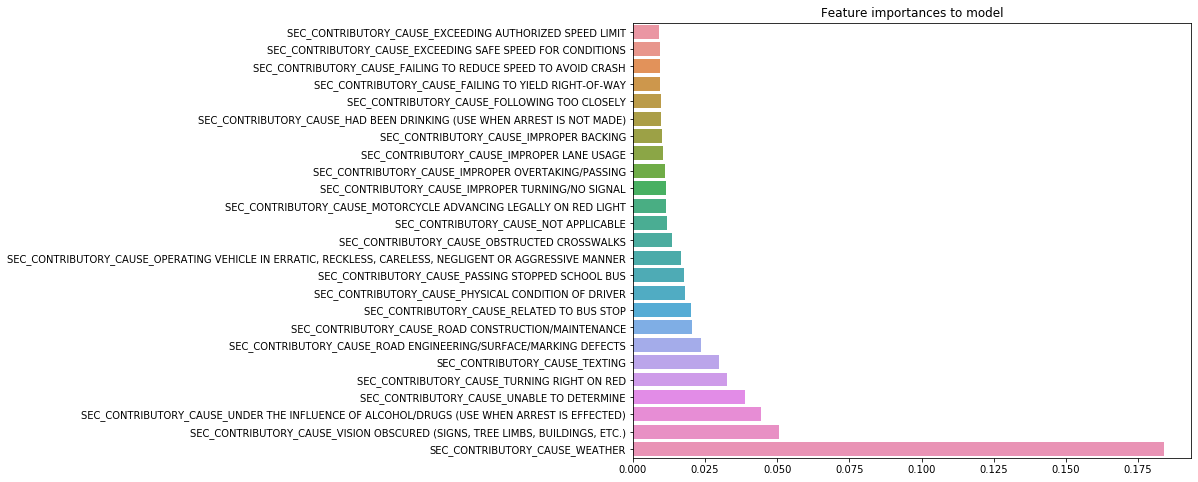

In [19]:
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    

features, ax = plt.subplots(figsize=(10,8))
sns.barplot( y=X_train.columns.values[-25: ], x=np.sort(rfc1.feature_importances_)[-25:], orient='h')
ax.set(title='Feature importances to model')
features.savefig('features.png', bbox_inches='tight');


# Modeling

There is a class imbalance in our target variable. No injury had the most by few hundred thousand. (No injury, minor injury, major injury).

We decided to prioritize our F-1 Macro score because the higher it is the better capture between precision and recall balance between all target variables.

## Decision Tree: Smote

In [20]:
X = dummy.drop(['INJURY_CLASSIFICATION'],axis=1)
y=dummy['INJURY_CLASSIFICATION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23 )

In [21]:
from imblearn.over_sampling import SMOTE

In [22]:
sm = SMOTE(sampling_strategy= 'not minority', random_state=23)
X_train, y_train = sm.fit_sample(X_train, y_train)
dtc = DecisionTreeClassifier(random_state=1, class_weight = 'balanced')
dtc = dtc.fit(X_train,y_train)
# y_pred_train = dtc.predict(X_train)
y_pred_test = dtc.predict(X_test)

In [23]:
print("Macro Testing F1 Score:",metrics.f1_score(y_test, y_pred_test, 
                                            average='macro',labels = [0,1,2]))
print("Micro Testing F1 Score:",metrics.f1_score(y_test, y_pred_test, 
                                            average='micro',labels = [0,1,2]))
print("Testing Accuracy Score:",metrics.accuracy_score(y_test, y_pred_test))


Macro Testing F1 Score: 0.44781256713481715
Micro Testing F1 Score: 0.9203960957433882
Testing Accuracy Score: 0.9203960957433883


## Random Forest Classifier: Smote

In [24]:
X = dummy.drop(['INJURY_CLASSIFICATION'],axis=1)
y=dummy['INJURY_CLASSIFICATION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23 )
sm = SMOTE(sampling_strategy= 'all', random_state=23,n_jobs=-1)
X_train, y_train = sm.fit_sample(X_train, y_train)


In [25]:
rfc1 = RandomForestClassifier(random_state=1, class_weight='balanced',n_jobs=-1,verbose=True)
rfc1.fit(X_train,y_train)
y_pred_test_rfc1 = rfc1.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   51.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.1min finished


RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=1,
                       verbose=True)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.8s finished


In [26]:
print("Macro Testing F1 Score:",metrics.f1_score(y_test, y_pred_test_rfc1, 
                                            average='macro',labels = [0,1,2]))
print("Micro Testing F1 Score:",metrics.f1_score(y_test, y_pred_test_rfc1, 
                                            average='micro',labels = [0,1,2]))
print("Testing Accuracy Score:",metrics.accuracy_score(y_test, y_pred_test_rfc1))

Macro Testing F1 Score: 0.419921833342753
Micro Testing F1 Score: 0.9470454821594914
Testing Accuracy Score: 0.9470454821594914


In [27]:
rfc1.feature_importances_
np.sort(rfc1.feature_importances_)[-15:]

array([6.09560723e-02, 2.50190528e-02, 4.87726090e-02, 3.46258835e-02,
       4.26930388e-02, 3.80874818e-02, 4.01637463e-02, 2.31359484e-06,
       3.68061827e-06, 1.87803379e-02, 3.36206336e-04, 1.62451247e-04,
       7.72770318e-04, 6.22294418e-06, 3.58663081e-04, 1.85016367e-02,
       1.03298161e-06, 1.43136417e-02, 0.00000000e+00, 4.62359480e-03,
       7.70764161e-03, 9.15591221e-04, 7.34684845e-03, 6.64417282e-02,
       1.10997599e-02, 2.46010781e-05, 6.27156840e-04, 7.38240962e-05,
       6.27032505e-04, 2.16680157e-03, 2.77172736e-05, 1.45179755e-04,
       9.46748210e-03, 4.78222675e-03, 2.66793954e-03, 1.23132294e-03,
       3.67799052e-05, 6.43181231e-04, 1.93776957e-03, 1.24381444e-06,
       3.50101878e-03, 5.53900730e-03, 4.16260002e-05, 1.57345896e-07,
       2.18225697e-05, 1.93544585e-03, 6.43700341e-03, 2.93858122e-04,
       1.01536351e-04, 2.35885708e-06, 1.55518856e-05, 1.20198037e-06,
       3.18234200e-06, 4.82109159e-04, 1.46194164e-02, 6.24696807e-04,
      

array([0.01461942, 0.01724975, 0.01843556, 0.01850164, 0.01878034,
       0.02501905, 0.03462588, 0.03808748, 0.04016375, 0.04212581,
       0.04269304, 0.04877261, 0.06095607, 0.06644173, 0.11661026])

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.twilight):
    import itertools
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks = np.arange(3)
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.yticks(np.arange(0, 3, step=1.2))
    plt.xticks(np.arange(0, 3, step=1.2))

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 verticalalignment="top",
                 color="black" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[46304   503     2]
 [ 1739   462     4]
 [  244   123     1]]


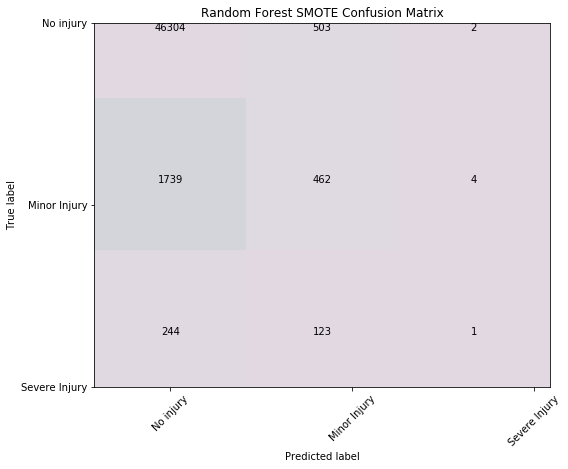

In [29]:
cnf_matrix = confusion_matrix(y_test, y_pred_test_rfc1,labels=[0,1,2])
#np.set_printoptions(precision=2)

confusion, ax = plt.subplots(figsize=(8,8))
plot_confusion_matrix(cnf_matrix, classes=['No injury','Minor Injury','Severe Injury'],
                      title='')
ax.set(title='Random Forest SMOTE Confusion Matrix')
confusion.savefig('confusion_smote.png', bbox_inches='tight');

# Ranking importances for primary cause of the crash


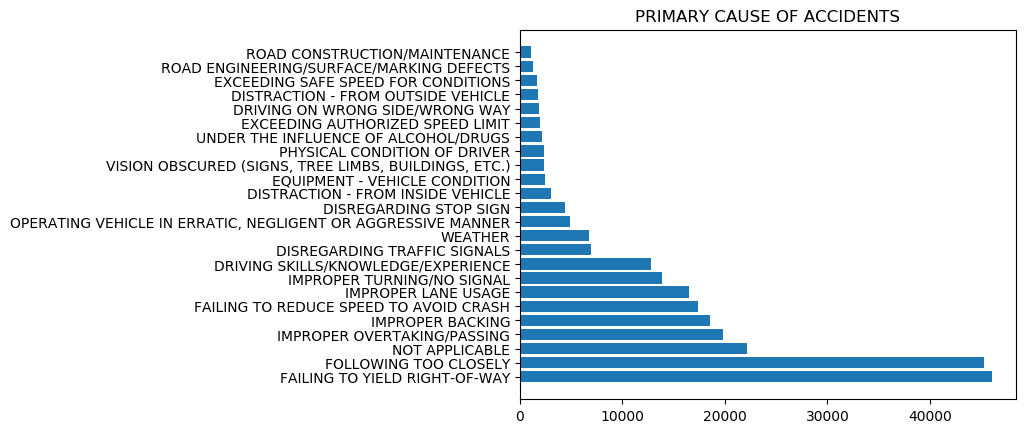

In [30]:
plt.rcdefaults()
fig, ax = plt.subplots()
people = (['FAILING TO YIELD RIGHT-OF-WAY', 'FOLLOWING TOO CLOSELY' ,'NOT APPLICABLE'
,'IMPROPER OVERTAKING/PASSING'
,'IMPROPER BACKING'
,'FAILING TO REDUCE SPEED TO AVOID CRASH'
,'IMPROPER LANE USAGE'
,'IMPROPER TURNING/NO SIGNAL'
,'DRIVING SKILLS/KNOWLEDGE/EXPERIENCE'
,'DISREGARDING TRAFFIC SIGNALS'
,'WEATHER'
,'OPERATING VEHICLE IN ERRATIC, NEGLIGENT OR AGGRESSIVE MANNER'
,'DISREGARDING STOP SIGN'
,'DISTRACTION - FROM INSIDE VEHICLE'
,'EQUIPMENT - VEHICLE CONDITION'
,'VISION OBSCURED (SIGNS, TREE LIMBS, BUILDINGS, ETC.)'
,'PHYSICAL CONDITION OF DRIVER'
,'UNDER THE INFLUENCE OF ALCOHOL/DRUGS'
,'EXCEEDING AUTHORIZED SPEED LIMIT'
,'DRIVING ON WRONG SIDE/WRONG WAY'
,'DISTRACTION - FROM OUTSIDE VEHICLE'
,'EXCEEDING SAFE SPEED FOR CONDITIONS'
,'ROAD ENGINEERING/SURFACE/MARKING DEFECTS'
,'ROAD CONSTRUCTION/MAINTENANCE'                                                         ])
y_pos = np.arange(len(people))
performance =  [46098
                    ,                                           45262
                     ,                                                 22140
                      ,                                  19847
                       ,                                            18523
                        ,                     17335
                         ,                                         16522
                          ,                                13855,
                                                  12808,
                                                        6971,
                 6740,
     4902,
                                                               4356,
                                                    2990
,                                                      2449
,                              2369
,                                                        2335
,                   2148
,                                                      1972
,                                                       1816
,                                                  1803
,                                                   1682
,                                              1273
,                                                         1068]
ax.barh( y_pos, performance )
ax.set_yticklabels(people)
ax.set_yticks(y_pos)
ax.set_title('PRIMARY CAUSE OF ACCIDENTS')
plt.show()
features.savefig('fig.png', bbox_inches='tight');

## Age plotted against risk rating

<Figure size 2000x1000 with 0 Axes>

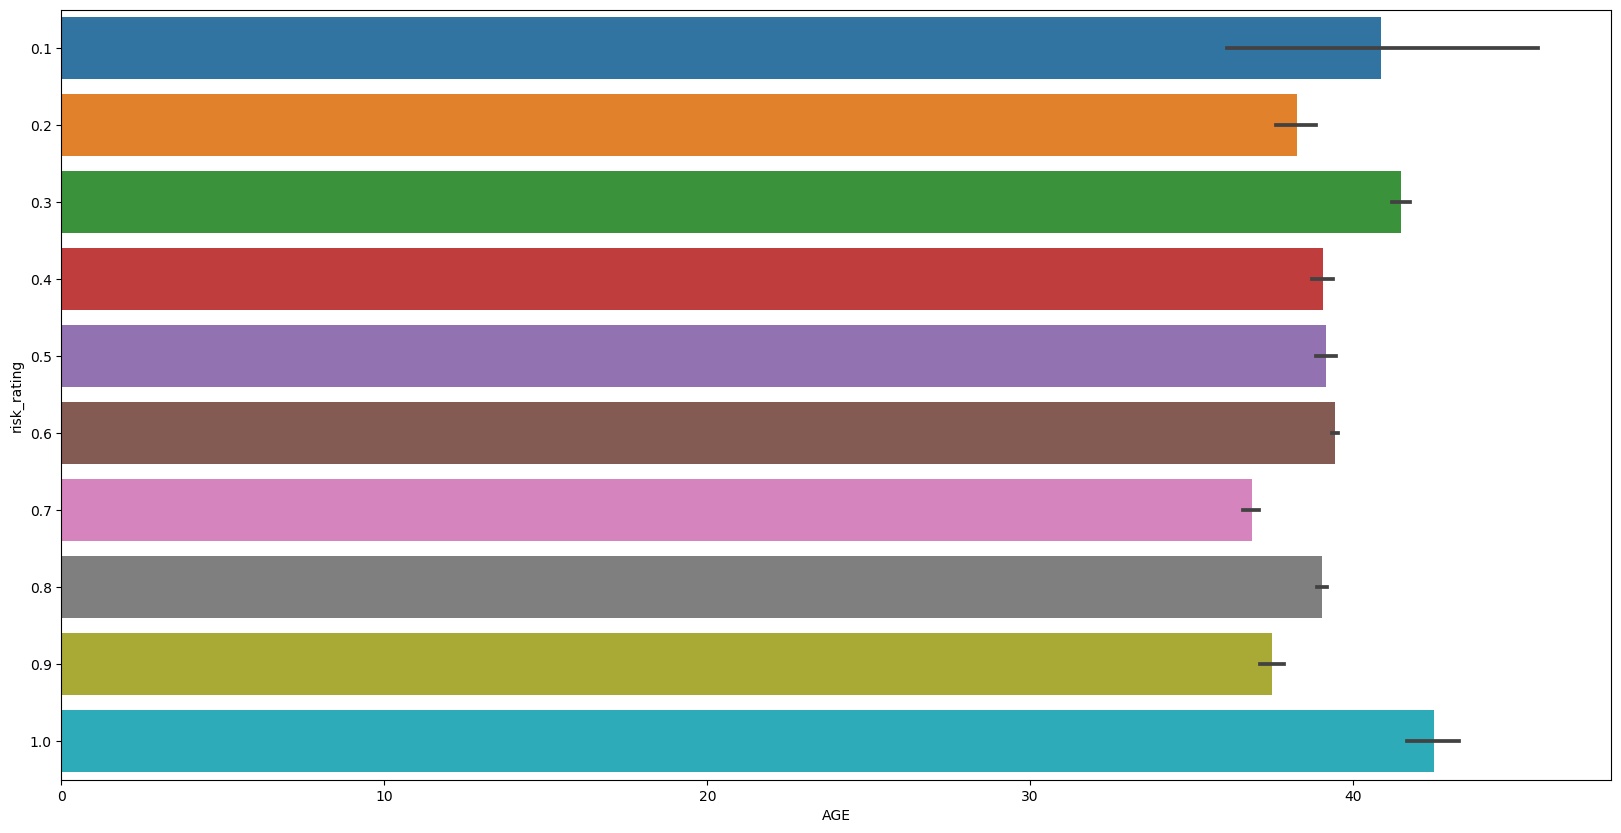

In [31]:
plt.figure(figsize=(20,10))
sns.barplot(y=result['risk_rating'], x = result['AGE'], orient='h',data=result)
#plt.xticks(rotation=90);


## At what age are you most risk exposed to each classification of injury?

In [32]:
graphing=result.groupby('INJURY_CLASSIFICATION').apply(lambda x:x.sort_values(by=['INJURY_CLASSIFICATION'],
                                                                    ascending=True))

In [33]:
graph_data=graphing[-1755: ]
graph_data['AGE'].value_counts()
graph_data1=graphing[0:235093]
graph_data1['AGE']
graph_data2=graphing[235093:246211]
graph_data2['AGE'].value_counts()

25    68
36    63
23    60
24    57
27    57
29    53
28    52
26    48
30    47
21    46
22    46
32    44
31    43
34    37
35    36
20    35
53    35
19    33
18    32
33    31
37    29
0     29
39    28
55    27
40    27
47    26
61    26
49    25
50    25
41    24
48    24
60    24
57    24
43    23
46    23
51    23
59    23
54    22
44    22
38    21
66    21
45    21
62    19
56    18
65    17
42    17
64    16
17    16
52    16
63    15
70    15
69    14
58    13
68    12
76    11
73    11
16    10
72     9
67     9
81     7
77     6
71     6
15     4
86     4
83     4
79     4
84     3
78     3
74     3
85     2
75     2
14     2
80     1
82     1
87     1
88     1
89     1
3      1
93     1
Name: AGE, dtype: int64

INJURY_CLASSIFICATION        
0                      0         36
                       591762     0
                       591764    80
                       591766    55
                       591768    39
                                 ..
1                      689277    49
                       689512    20
                       689532    35
                       689666    65
                       689691    45
Name: AGE, Length: 235093, dtype: int64

23     389
25     388
24     372
26     369
36     363
27     357
29     355
28     342
21     339
22     332
30     318
20     308
31     290
32     284
19     253
35     236
33     219
39     212
37     202
34     196
18     191
38     186
40     176
49     165
48     160
46     157
47     153
0      151
53     148
41     148
43     146
51     141
52     140
55     140
45     138
44     137
60     136
50     132
42     130
54     123
17     123
58     122
56     122
63     117
57     115
59     114
61     110
62     100
64      87
69      78
66      77
68      76
65      75
67      69
70      54
16      51
71      45
76      44
74      39
73      35
72      32
75      32
77      31
79      29
78      27
80      25
82      24
83      19
84      15
81      14
15      13
85      13
89      10
86       9
88       9
87       8
14       5
90       5
93       3
91       3
92       3
95       2
11       2
96       1
2        1
3        1
13       1
6        1
94       1
110      1
7        1

In [34]:
graph_data2['AGE'].value_counts()


23     389
25     388
24     372
26     369
36     363
27     357
29     355
28     342
21     339
22     332
30     318
20     308
31     290
32     284
19     253
35     236
33     219
39     212
37     202
34     196
18     191
38     186
40     176
49     165
48     160
46     157
47     153
0      151
53     148
41     148
43     146
51     141
52     140
55     140
45     138
44     137
60     136
50     132
42     130
54     123
17     123
58     122
56     122
63     117
57     115
59     114
61     110
62     100
64      87
69      78
66      77
68      76
65      75
67      69
70      54
16      51
71      45
76      44
74      39
73      35
72      32
75      32
77      31
79      29
78      27
80      25
82      24
83      19
84      15
81      14
15      13
85      13
89      10
86       9
88       9
87       8
14       5
90       5
93       3
91       3
92       3
95       2
11       2
96       1
2        1
3        1
13       1
6        1
94       1
110      1
7        1

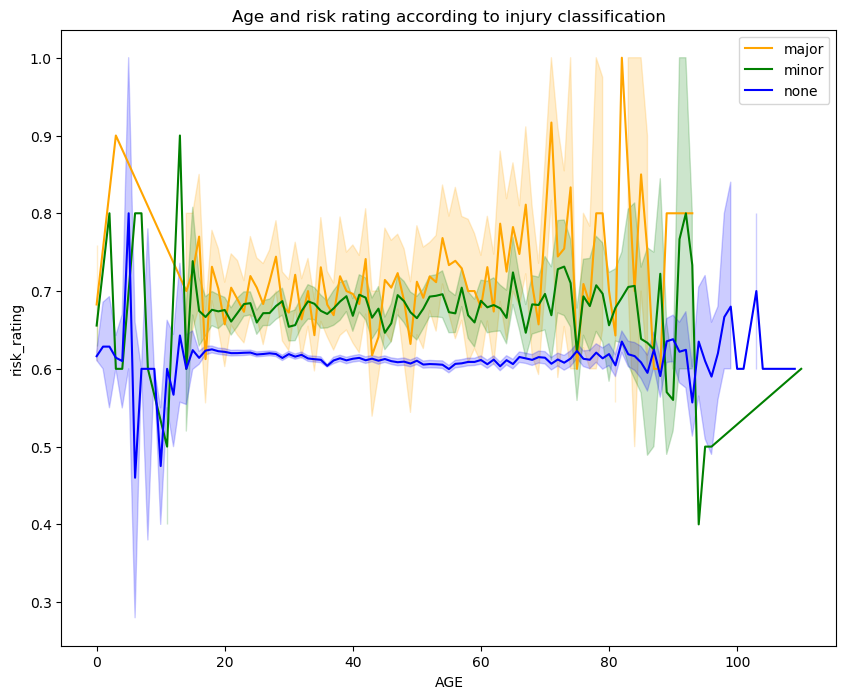

In [35]:
line, ax = plt.subplots(figsize=(10,8))
sns.lineplot(y=graph_data['risk_rating'], x = graph_data['AGE'], data=result, color = 'orange', label='major')
sns.lineplot(y=graph_data2['risk_rating'], x = graph_data2['AGE'], data=result, color ='green', label = 'minor')
sns.lineplot(y=graph_data1['risk_rating'], x = graph_data1['AGE'], data=result, color = 'blue', label = 'none')
ax.set(title='Age and risk rating according to injury classification')
line.savefig('line.png', bbox_inches='tight');

## GridSearch: Smote

The parameters that we tuned did not help our model F-1 score. 

In [36]:
# X = dummy.drop(['INJURY_CLASSIFICATION'],axis=1)
# y=dummy['INJURY_CLASSIFICATION']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23 )
# sm = SMOTE(sampling_strategy= 'all', random_state=23,n_jobs=-1)
# X_train, y_train = sm.fit_sample(X_train, y_train)
# parameters ={'criterion': ['entropy','gini'],'max_depth':range(1,10),'max_leaf_nodes':range(3,15),'n_estimators' : [100,200,'warn']}
# rfc_grid = RandomForestClassifier(random_state=1, class_weight='balanced',n_jobs=-1,verbose=True)
# grid_tree = GridSearchCV(rfc_grid, parameters, cv=5, n_jobs =-1)
# grid_tree.fit(X_train,y_train)

# print(grid_tree.best_estimator_)
# y_pred = grid_tree.best_estimator_.predict(X_test)
# print("Testing F1 Score:",metrics.f1_score(y_test, y_pred, 
#                                             average='micro'))

## Calculating if the sklearn model evaluation matrics matches with hand calculations

In [37]:
import sklearn
matrix = sklearn.metrics.confusion_matrix(y_test, y_pred_test_rfc1)
matrix

array([[46304,   503,     2],
       [ 1739,   462,     4],
       [  244,   123,     1]])

## Micro F-1

In [38]:
TP0 = matrix[0][0] 
TP1 = matrix[1][1] 
TP2 = matrix[2][2] 
TP =TP0+TP1+TP2
FP0 = matrix[1][0]+matrix[2][0] 
FP1 = matrix[0][1] + matrix[2][1] 
FP2 = matrix[0][2] + matrix[1][2] 
FP = FP0+FP1+FP2
TN0 = matrix[1][1] + matrix[2][1] + matrix[1][2] + matrix[2][2] 
TN1 = matrix[0][0] +matrix[2][0] + matrix[2][0] + matrix[2][2] 
TN2 = matrix[0][0] + matrix[1][0] + matrix[0][1] + matrix[1][1] 
TN = TN0+TN1+TN2
FN0 = matrix[0][1] + matrix[0][2] 
FN1 =matrix[1][0] + matrix[1][2] 
FN2 = matrix[2][0] + matrix[2][1] 
FN= FN0+FN1+FN2

In [39]:
P =TP/ (TP+FP)
P

0.9470454821594914

In [40]:
R = TP/(TP+FN)
R

0.9470454821594914

In [41]:
F1 = 2*((P*R)/(P+R))
F1

0.9470454821594914

## Macro F-1 Score

In [42]:
TP0 = matrix[0][0] 
TP1 = matrix[1][1] 
TP2 = matrix[2][2] 
TP =TP0+TP1+TP2
FP0 = matrix[1][0]+matrix[2][0] 
FP1 = matrix[0][1] + matrix[2][1] 
FP2 = matrix[0][2] + matrix[1][2] 
FP = FP0+FP1+FP2
TN0 = matrix[1][1] + matrix[2][1] + matrix[1][2] + matrix[2][2] 
TN1 = matrix[0][0] +matrix[2][0] + matrix[2][0] + matrix[2][2] 
TN2 = matrix[0][0] + matrix[1][0] + matrix[0][1] + matrix[1][1] 
TN = TN0+TN1+TN2
FN0 = matrix[0][1] + matrix[0][2] 
FN1 =matrix[1][0] + matrix[1][2] 
FN2 = matrix[2][0] + matrix[2][1] 
FN= FN0+FN1+FN2

In [43]:
((TP0/(TP0+FP0))+(TP1/(TP1+FP1))+(TP2/(TP2+FP2)))/3

0.5088075139866041

## Sampling to make even 

Need to up and down sample the classifications to 20,000 observations

No injury was severly higher in observations than major and minor injury

In [44]:
downsample1 = dummy[(dummy['INJURY_CLASSIFICATION']==1)|(dummy['INJURY_CLASSIFICATION']==0)]
downsample2 = dummy[(dummy['INJURY_CLASSIFICATION']==2)|(dummy['INJURY_CLASSIFICATION']==1)]
fatalinjury = downsample2[downsample2.INJURY_CLASSIFICATION==2]
majorinjury = downsample2[downsample2.INJURY_CLASSIFICATION==1]
minorinjury = downsample1[downsample1.INJURY_CLASSIFICATION==0]

In [45]:
upsample1 = resample(fatalinjury,
                          replace=True, # sample with replacement
                          n_samples=20000, # match number in majority class
                          random_state=23) # reproducible results




In [46]:
downsampled = resample(minorinjury,
                                replace = False, # sample without replacement
                                n_samples = 20000, # match minority n
                                random_state = 23) # reproducible results

In [47]:
midsample = resample(majorinjury,
                                replace = True, # sample without replacement
                                n_samples = 20000, # match minority n
                                random_state = 23)

In [48]:
sampling = pd.concat([upsample1, downsampled,midsample])

## Random Forest: New class balance 

In [49]:
X = dummy.drop(['INJURY_CLASSIFICATION'],axis=1)
y=dummy['INJURY_CLASSIFICATION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23 )

In [50]:
X_train = sampling.drop(['INJURY_CLASSIFICATION'],axis=1)
y_train = sampling['INJURY_CLASSIFICATION']
rfc1 = RandomForestClassifier(random_state=1, class_weight='balanced',n_jobs=-1,verbose=True)
rfc1 = rfc1.fit(X_train,y_train)
y_pred_test_rfc1 = rfc1.predict(X_test)
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test_rfc1, 
                                            average='macro',labels = [0,1,2]))
print("Testing Accuracy Score:",metrics.accuracy_score(y_test, y_pred_test_rfc1))

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    6.2s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   14.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s


Testing F1 Score: 0.7581142517579563
Testing Accuracy Score: 0.8649507917864809


[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


Confusion matrix, without normalization
[[40188  6592    29]
 [   44  2157     4]
 [    0     0   368]]


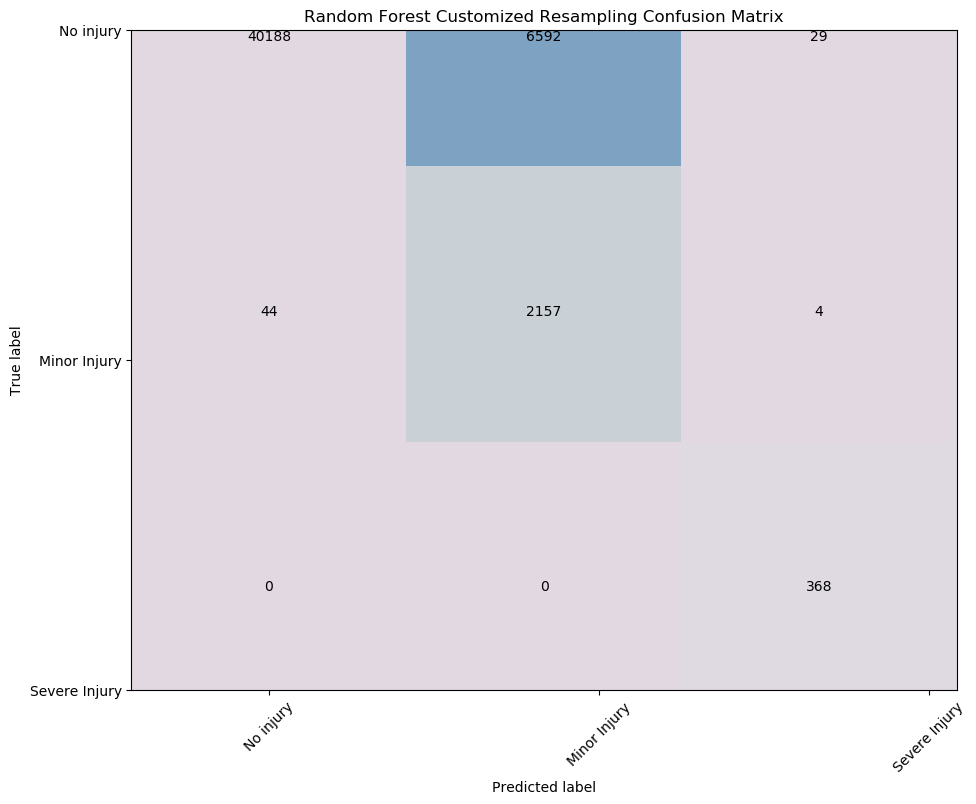

In [51]:
cnf_matrix = confusion_matrix(y_test, y_pred_test_rfc1,labels=[0,1,2])
#np.set_printoptions(precision=2)
confusion_balance, ax = plt.subplots(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['No injury','Minor Injury','Severe Injury'],
                      title='')
ax.set(title='Random Forest Customized Resampling Confusion Matrix')
confusion_balance.savefig('Random_Forest_with_feature_model.png', bbox_inches='tight');

## Decision Tree: New class balance

In [52]:
dtc = DecisionTreeClassifier( criterion='gini', class_weight='balanced')
dtc.fit(X_train, y_train)
y_preds=dtc.predict(X_test)
print("Testing F1 Score:", metrics.f1_score(y_test, y_preds, average='macro'))
print("Testing Accuracy Score:", metrics.accuracy_score(y_test, y_preds))

DecisionTreeClassifier(class_weight='balanced')

Testing F1 Score: 0.6109595155800672
Testing Accuracy Score: 0.8753999432991778


## KNN: New class balance

In [53]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6, weights='distance', algorithm='kd_tree', n_jobs=-1)
knn.fit(X_train, y_train)
knn_preds=knn.predict(X_test)
print("Testing F1 Score:", metrics.f1_score(y_test, knn_preds, average='macro'))
print("Testing Accuracy Score:", metrics.accuracy_score(y_test, knn_preds))

KNeighborsClassifier(algorithm='kd_tree', n_jobs=-1, n_neighbors=6,
                     weights='distance')

Testing F1 Score: 0.4329078613711717
Testing Accuracy Score: 0.7281398080272163


## Voting Classifier: New class balance

In [54]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
                estimators=[('r_forest', rfc1), ('knneighbors', knn), ('decisiontree', dtc)], 
                voting='soft')
voting_clf.fit(X_train, y_train)
vc_preds = voting_clf.predict(X_test)
print(metrics.f1_score(y_test, vc_preds, average='macro'))
print("Testing Accuracy Score:", metrics.accuracy_score(y_test, vc_preds))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   13.9s finished


VotingClassifier(estimators=[('r_forest',
                              RandomForestClassifier(class_weight='balanced',
                                                     n_jobs=-1, random_state=1,
                                                     verbose=True)),
                             ('knneighbors',
                              KNeighborsClassifier(algorithm='kd_tree',
                                                   n_jobs=-1, n_neighbors=6,
                                                   weights='distance')),
                             ('decisiontree',
                              DecisionTreeClassifier(class_weight='balanced'))],
                 voting='soft')

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


0.662354683166451
Testing Accuracy Score: 0.8778907294155766


# Modeling without the feature: Random Forest regular defaults (Best model)

In [55]:
dummy.drop('risk_rating',axis=1,inplace=True)
sampling.drop('risk_rating',axis=1,inplace=True)

In [56]:
X = dummy.drop(['INJURY_CLASSIFICATION'],axis=1)
y=dummy['INJURY_CLASSIFICATION']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23 )
X_train = sampling.drop(['INJURY_CLASSIFICATION'],axis=1)
y_train = sampling['INJURY_CLASSIFICATION']
rfc1 = RandomForestClassifier(random_state=1, class_weight='balanced',n_jobs=-1,verbose=True)
rfc1 = rfc1.fit(X_train,y_train)
y_pred_test_rfc1 = rfc1.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    3.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    8.3s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.6s finished


In [57]:
print("Macro Testing F1 Score:",metrics.f1_score(y_test, y_pred_test_rfc1, 
                                            average='macro',labels = [0,1,2]))
print("Micro Testing F1 Score:",metrics.f1_score(y_test, y_pred_test_rfc1, 
                                            average='micro',labels = [0,1,2]))
print("Testing Accuracy Score:",metrics.accuracy_score(y_test, y_pred_test_rfc1))


Macro Testing F1 Score: 0.757079609157452
Micro Testing F1 Score: 0.8626625086063748
Testing Accuracy Score: 0.8626625086063748


Confusion matrix, without normalization
[[40076  6706    27]
 [   45  2156     4]
 [    0     0   368]]


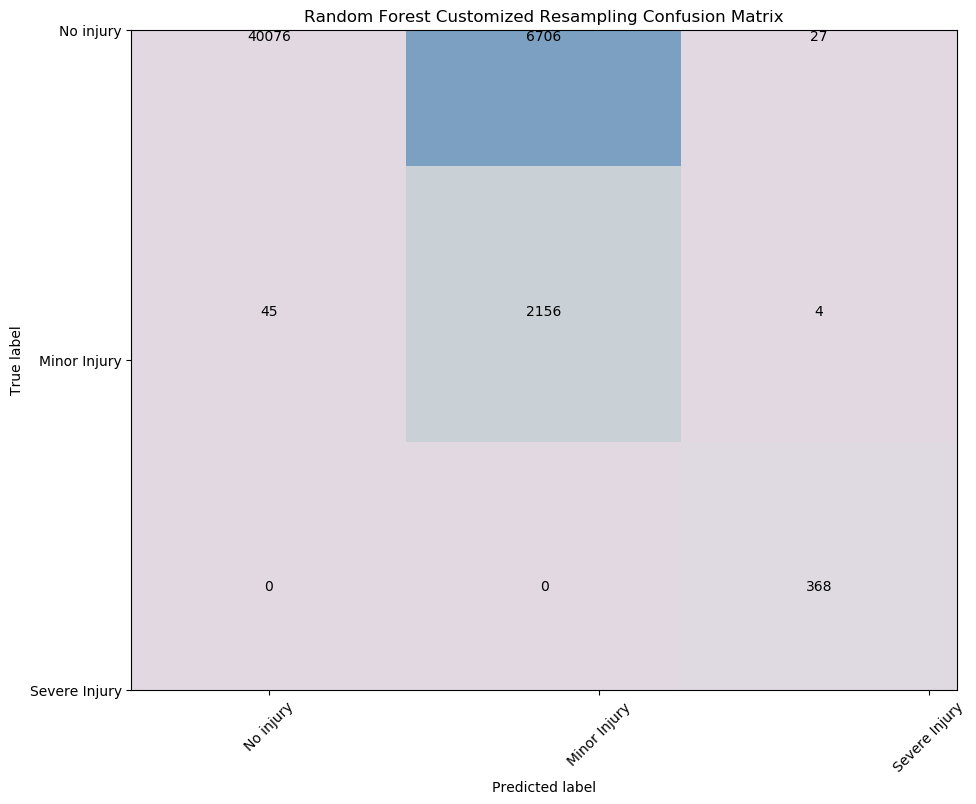

In [58]:
cnf_matrix = confusion_matrix(y_test, y_pred_test_rfc1,labels=[0,1,2])
#np.set_printoptions(precision=2)
best_model_confusion, ax = plt.subplots(figsize=(10,8))
plot_confusion_matrix(cnf_matrix, classes=['No injury','Minor Injury','Severe Injury'],
                      title='')
ax.set(title='Random Forest Customized Resampling Confusion Matrix')
best_model_confusion.savefig('best_model_confusion.png', bbox_inches='tight');

# GridSearch modeling without the feature: Random Forest 


In [59]:
# X = dummy.drop(['INJURY_CLASSIFICATION'],axis=1)
# y=dummy['INJURY_CLASSIFICATION']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23 )
# X_train = sampling.drop(['INJURY_CLASSIFICATION'],axis=1)
# y_train = sampling['INJURY_CLASSIFICATION']
# parameters ={'criterion': ['entropy','gini'],'max_depth':range(4,11),'max_leaf_nodes':range(3,10),'n_estimators' : [100,200,500]}
# rfc_grid = RandomForestClassifier(random_state=1, class_weight='balanced',n_jobs=-1,verbose=1)
# grid_tree = GridSearchCV(rfc_grid, parameters, cv=5, n_jobs =-1)
# grid_tree.fit(X_train,y_train)
# print(grid_tree.best_estimator_)


In [60]:
# y_pred = grid_tree.best_estimator_.predict(X_test)
# print("Testing F1 Score:",metrics.f1_score(y_test, y_pred, 
#                                             average='macro'))

Grid Search Macro F-1: 0.43366872202793694

Feature does not help our model

,PERSON_TYPE,SEX,AGE,SAFETY_EQUIPMENT,AIRBAG_DEPLOYED,EJECTION,INJURY_CLASSIFICATION,DRIVER_ACTION,DRIVER_VISION,PHYSICAL_CONDITION,...,ROAD_DEFECT,CRASH_TYPE,DAMAGE,PRIM_CONTRIBUTORY_CAUSE,SEC_CONTRIBUTORY_CAUSE,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,prim,risk_rating
0,DRIVER,M,36,USAGE UNKNOWN,NOT APPLICABLE,NONE,0,FAILED TO YIELD,UNKNOWN,NORMAL,...,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,12,3,8,3.0,0.6
2,DRIVER,M,36,SAFETY BELT USED,DID NOT DEPLOY,NONE,0,FOLLOWED TOO CLOSELY,UNKNOWN,NORMAL,...,NO DEFECTS,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,NOT APPLICABLE,17,6,7,3.0,0.6
6,DRIVER,M,29,SAFETY BELT USED,DID NOT DEPLOY,NONE,0,NONE,NOT OBSCURED,NORMAL,...,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,21,7,10,3.0,0.6
13,DRIVER,F,30,USAGE UNKNOWN,DID NOT DEPLOY,NONE,0,IMPROPER LANE CHANGE,UNKNOWN,UNKNOWN,...,NO DEFECTS,NO INJURY / DRIVE AWAY,"$501 - $1,500",UNABLE TO DETERMINE,UNABLE TO DETERMINE,18,7,11,3.0,0.6
16,DRIVER,M,30,SAFETY BELT USED,DID NOT DEPLOY,NONE,0,FOLLOWED TOO CLOSELY,UNKNOWN,UNKNOWN,...,WORN SURFACE,NO INJURY / DRIVE AWAY,"OVER $1,500",FOLLOWING TOO CLOSELY,UNABLE TO DETERMINE,16,3,11,3.0,0.6
